In [44]:
import numpy
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils

In [45]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential

import pandas as pd

In [46]:
K.set_image_data_format('channels_last')

In [47]:
K

<module 'keras.backend' from '/usr/local/lib/python3.7/site-packages/keras/backend/__init__.py'>

In [48]:
X = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [49]:
y = X["label"]

In [50]:
X.drop(["label"], inplace = True, axis = 1)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

In [52]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [53]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [54]:
import matplotlib.pyplot as plt

In [55]:
unique, count = numpy.unique(Y_train, return_counts=True)

In [56]:
target_counts = pd.DataFrame(count, index= unique)
target_counts

,0
0,3316
1,3775
2,3331
3,3414
4,3233
5,3093
6,3352
7,3508
8,3228
9,3350


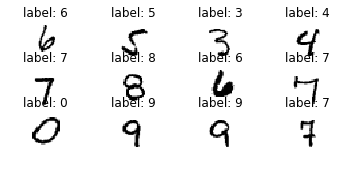

In [57]:
images_and_labels = list(zip(X_train, Y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5,4, index+1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' %label)

In [58]:
from keras.layers import Dropout

In [59]:
model = Sequential()

In [60]:
model.add(Conv2D(40, kernel_size=5, padding="same", input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [61]:
model.add(Conv2D(70, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(500, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(1024, kernel_size=3, padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [62]:
from keras.layers.core import Activation

model.add(Flatten())
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
import tensorflow

In [64]:
Y_train = np_utils.to_categorical(Y_train).astype('int32')
Y_test = np_utils.to_categorical(Y_test)

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [66]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

from keras.preprocessing.image import ImageDataGenerator
X_train2 = numpy.array(X_train, copy=True) 
Y_train2 = numpy.array(Y_train, copy=True) 

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    )

datagen.fit(X_train)

print(type(X_train2))
print(type(X_train))

# Concatenating the old data with the augmented data
result_x  = numpy.concatenate((X_train, X_train2), axis=0)
result_y  = numpy.concatenate((Y_train, Y_train2), axis=0)


# # fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(result_x, result_y, batch_size=35),
                    steps_per_epoch=len(X_train) / 32, epochs = 12)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Instructions for updating:
Use tf.cast instead.
Epoch 1/12
 500/1050 [=============>................] - ETA: 6:33 - loss: 0.5319 - acc: 0.8305

KeyboardInterrupt: 

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'